In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
postcovid = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
precovid = pd.read_csv('Crime_Data_from_2010_to_2019.csv')

In [103]:
postcovid.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [104]:
precovid.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


## Data Preprocessing

In [105]:
# Drop columns that are not needed
postcovid = postcovid.drop(columns = ['Part 1-2', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'])
precovid = precovid.drop(columns = ['Part 1-2', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'])

In [106]:
# Drop rows with NaN values in specified columns
postcovid = postcovid.dropna(subset=['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc'])
precovid = precovid.dropna(subset=['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc','Date Rptd','DATE OCC','Status'])

In [107]:
# table of columns and their descriptions
column_descriptions = [
    'Unique identifier for each crime incident',
    'Date when the crime incident was reported',
    'Date when the crime incident occurred',
    'Time when the crime incident occurred',
    'Area ID',
    'Area Name',
    'Reporting District ID',
    'Crime Code ID',
    'Crime Code Description',
    'MO Codes',
    'Victim Age',
    'Victim Sex',
    'Victim Descent',
    'Premise Code',
    'Premise Description',
    'Status Code',
    'Status Description',
    'Location',
    'Latitude',
    'Longitude'
]

columns_info_table = pd.DataFrame({
    "Data Type": postcovid.dtypes,
    "Null Count": postcovid.isna().sum(),
    'Description': column_descriptions
})

columns_info_table

,Data Type,Null Count,Description
DR_NO,int64,0,Unique identifier for each crime incident
Date Rptd,object,0,Date when the crime incident was reported
DATE OCC,object,0,Date when the crime incident occurred
TIME OCC,int64,0,Time when the crime incident occurred
AREA,int64,0,Area ID
AREA NAME,object,0,Area Name
Rpt Dist No,int64,0,Reporting District ID
Crm Cd,int64,0,Crime Code ID
Crm Cd Desc,object,0,Crime Code Description
Mocodes,object,0,MO Codes


In [108]:
# Convert date columns to datetime format
postcovid["Date Rptd"] = pd.to_datetime(postcovid["Date Rptd"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")
postcovid["DATE OCC"] = pd.to_datetime(postcovid["DATE OCC"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")

precovid["Date Rptd"] = pd.to_datetime(precovid["Date Rptd"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")
precovid["DATE OCC"] = pd.to_datetime(precovid["DATE OCC"], errors='coerce', format="%m/%d/%Y %I:%M:%S %p")

In [109]:
# Filtering Victim Age (minimum age is 14 to be convicted for a crime)
postcovid = postcovid[(postcovid["Vict Age"] >= 14) & (postcovid["Vict Age"] <= 100)]
precovid = precovid[(precovid["Vict Age"] >= 14) & (precovid["Vict Age"] <= 100)]

In [110]:
# Convert columns to categorical
crime_code_columns1 = ["Crm Cd", "Crm Cd Desc", "Vict Sex", "Vict Descent", "Status", "Premis Desc"]
postcovid[crime_code_columns1] = postcovid[crime_code_columns1].astype("category")

crime_code_columns2 = ["Crm Cd", "Crm Cd Desc", "Vict Sex", "Vict Descent", "Status", "Premis Desc"]
precovid[crime_code_columns2] = precovid[crime_code_columns2].astype("category")

In [111]:
# Filter for dates between 2016 and 2019 for precovid
precovid = precovid[(precovid["Date Rptd"] >= '2016-01-01') & (precovid["Date Rptd"] <= '2019-12-31')]

In [112]:
postcovid.describe()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Vict Age,Premis Cd,LAT,LON
count,5.497990e+05,549799,549799,549799.000000,549799.000000,549799.000000,549799.000000,549799.000000,549799.000000,549799.000000
mean,2.145353e+08,2021-10-21 09:46:06.026856960,2021-10-10 18:20:58.404616960,1322.747675,10.667144,1113.060380,40.018492,332.231801,33.972162,-117.998750
min,1.030447e+07,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,1.000000,101.000000,14.000000,101.000000,0.000000,-118.667600
25%,2.021090e+08,2020-12-17 00:00:00,2020-12-04 00:00:00,900.000000,5.000000,587.000000,28.000000,104.000000,34.014900,-118.432700
50%,2.118212e+08,2021-11-09 00:00:00,2021-10-28 00:00:00,1400.000000,11.000000,1132.000000,37.000000,403.000000,34.058700,-118.324400
75%,2.214097e+08,2022-08-29 00:00:00,2022-08-18 00:00:00,1845.000000,16.000000,1622.000000,50.000000,502.000000,34.164900,-118.274900
max,2.399097e+08,2023-06-19 00:00:00,2023-06-19 00:00:00,2359.000000,21.000000,2199.000000,99.000000,971.000000,34.334300,0.000000
std,1.014197e+07,NaN,NaN,653.161671,6.157904,615.521051,15.230774,216.627003,1.873293,6.496425


In [113]:
precovid.describe()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Vict Age,Premis Cd,LAT,LON
count,7.149920e+05,714992,714992,714992.000000,714992.000000,714992.000000,714992.000000,714992.000000,714992.000000,714992.000000
mean,1.760446e+08,2017-12-28 05:44:53.333631744,2017-12-07 07:03:34.330789888,1344.653455,10.914731,1138.012586,39.823646,320.895595,34.077394,-118.356411
min,2.030536e+07,2016-01-01 00:00:00,2010-01-01 00:00:00,1.000000,1.000000,100.000000,14.000000,101.000000,0.000000,-118.667700
25%,1.701067e+08,2017-01-02 00:00:00,2016-12-15 00:00:00,910.000000,6.000000,632.000000,27.000000,103.000000,34.014500,-118.436700
50%,1.721196e+08,2017-12-27 00:00:00,2017-12-11 00:00:00,1406.000000,11.000000,1158.000000,37.000000,242.000000,34.061500,-118.329400
75%,1.821121e+08,2018-12-19 00:00:00,2018-12-08 00:00:00,1900.000000,16.000000,1665.000000,51.000000,501.000000,34.172000,-118.277400
max,2.116067e+08,2019-12-31 00:00:00,2019-12-31 00:00:00,2359.000000,21.000000,2199.000000,99.000000,971.000000,34.329800,0.000000
std,1.111915e+07,NaN,NaN,649.897362,6.154172,615.264209,15.609284,213.129255,0.204303,0.603431


In [114]:
# number of observations for precovid
precovid.shape

(714992, 20)

In [115]:
# number of observations for postcovid
postcovid.shape

(549799, 20)

In [116]:
postcovid.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [117]:
precovid.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [118]:
postcovid.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Crm Cd                category
Crm Cd Desc           category
Mocodes                 object
Vict Age                 int64
Vict Sex              category
Vict Descent          category
Premis Cd              float64
Premis Desc           category
Status                category
Status Desc             object
LOCATION                object
LAT                    float64
LON                    float64
dtype: object

In [119]:
precovid.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                 int64
AREA                     int64
AREA NAME               object
Rpt Dist No              int64
Crm Cd                category
Crm Cd Desc           category
Mocodes                 object
Vict Age                 int64
Vict Sex              category
Vict Descent          category
Premis Cd              float64
Premis Desc           category
Status                category
Status Desc             object
LOCATION                object
LAT                    float64
LON                    float64
dtype: object

In [120]:
# Checking Skewness and Kurtosis of Victim Age Distribution 
from scipy.stats import skew, kurtosis

# Skewness and Kurtosis for Pre-Covid Data
precovid_skew = skew(precovid['Vict Age'].dropna())
precovid_kurt = kurtosis(precovid['Vict Age'].dropna())

# Skewness and Kurtosis for Post-Covid Data
postcovid_skew = skew(postcovid['Vict Age'].dropna())
postcovid_kurt = kurtosis(postcovid['Vict Age'].dropna())

print("Pre-Covid Victim Age:")
print(f"Skewness: {precovid_skew:.2f}")
print(f"Kurtosis: {precovid_kurt:.2f}")

print("\nPost-Covid Victim Age:")
print(f"Skewness: {postcovid_skew:.2f}")
print(f"Kurtosis: {postcovid_kurt:.2f}")

Pre-Covid Victim Age:
Skewness: 0.64
Kurtosis: -0.12

Post-Covid Victim Age:
Skewness: 0.69
Kurtosis: -0.05


In [121]:
# checking for duplicates
precovid_duplicates = precovid.duplicated().sum()
postcovid_duplicates = postcovid.duplicated().sum()

print(f"Number of duplicate records in Pre-Covid dataset: {precovid_duplicates}")
print(f"Number of duplicate records in Post-Covid dataset: {postcovid_duplicates}")

Number of duplicate records in Pre-Covid dataset: 0
Number of duplicate records in Post-Covid dataset: 0


## Data Exploration

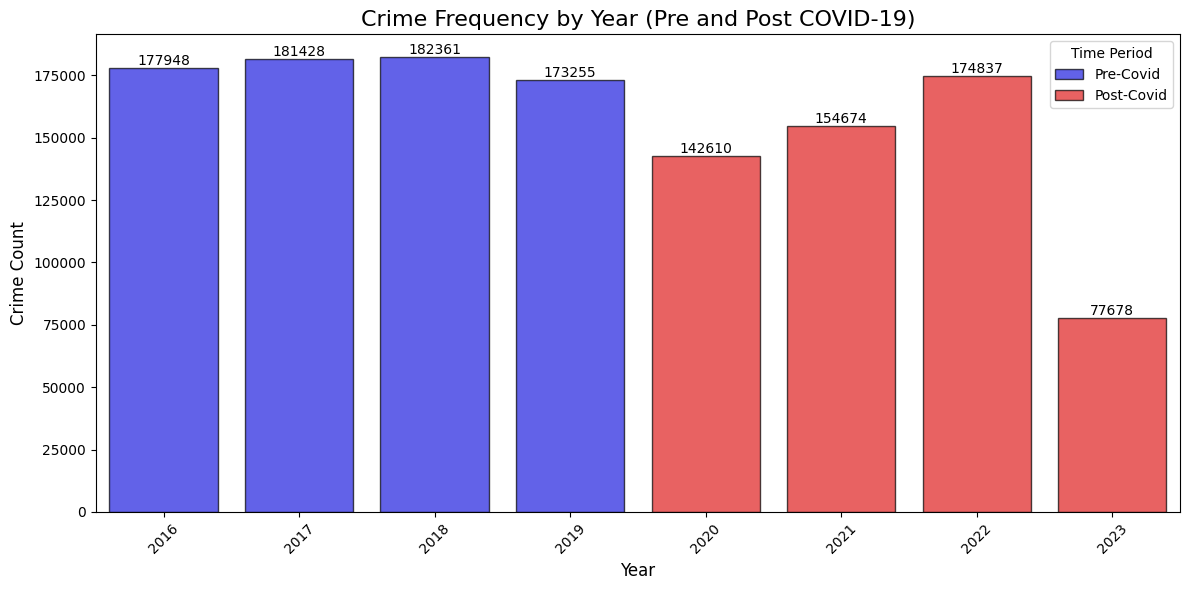

In [81]:
# bar chart for crime frequency by year
precovid['Year'] = precovid['Date Rptd'].dt.year
postcovid['Year'] = postcovid['Date Rptd'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=precovid, color='blue', label='Pre-Covid', alpha=0.7, edgecolor='black')
sns.countplot(x='Year', data=postcovid, color='red', label='Post-Covid', alpha=0.7, edgecolor='black')

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x() + p.get_width() / 2., height + 10, int(height), ha="center", va="bottom", fontsize=10)

plt.title('Crime Frequency by Year (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.legend(title="Time Period", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

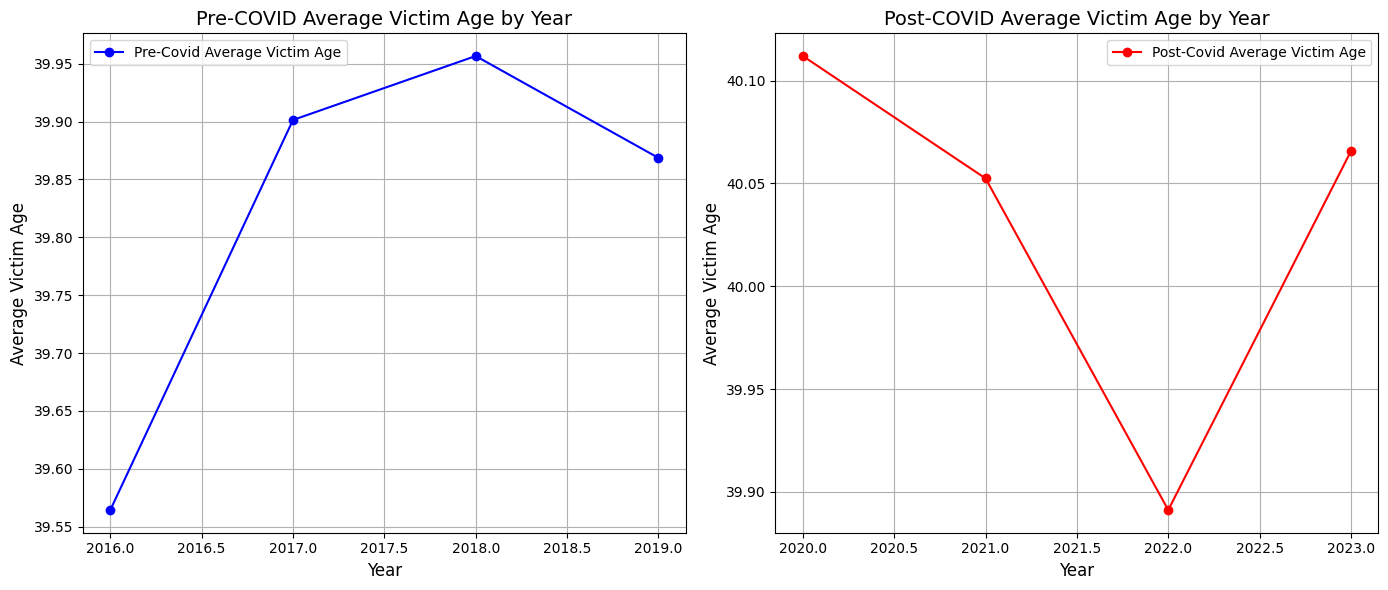

In [82]:
# average age of victims for both pre-pandemic and post-pandemic data
precovid_avg_age = precovid.groupby('Year')['Vict Age'].mean()
postcovid_avg_age = postcovid.groupby('Year')['Vict Age'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(precovid_avg_age.index, precovid_avg_age, label='Pre-Covid Average Victim Age', color='blue', marker='o')
axes[0].set_title('Pre-COVID Average Victim Age by Year', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Average Victim Age', fontsize=12)
axes[0].legend()
axes[0].grid(True)

axes[1].plot(postcovid_avg_age.index, postcovid_avg_age, label='Post-Covid Average Victim Age', color='red', marker='o')
axes[1].set_title('Post-COVID Average Victim Age by Year', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Average Victim Age', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

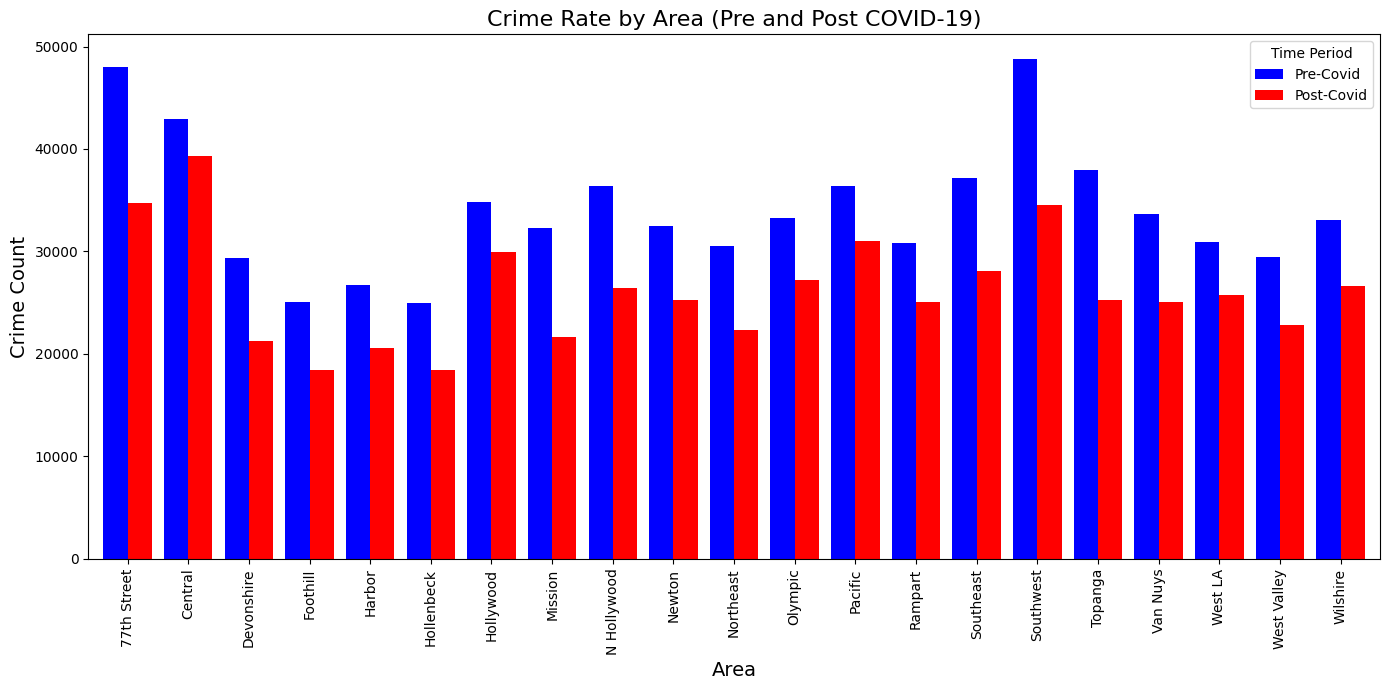

In [83]:
# crime rate by area
precovid_area = precovid.groupby('AREA NAME').size().sort_values(ascending=False)
postcovid_area = postcovid.groupby('AREA NAME').size().sort_values(ascending=False)

area_data = pd.DataFrame({
    'Pre-Covid': precovid_area,
    'Post-Covid': postcovid_area
}).fillna(0)

plt.figure(figsize=(14, 7))
area_data.plot(kind='bar', width=0.8, color=['blue', 'red'], ax=plt.gca())

plt.title('Crime Rate by Area (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Crime Count', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title="Time Period")
plt.tight_layout()
plt.show()

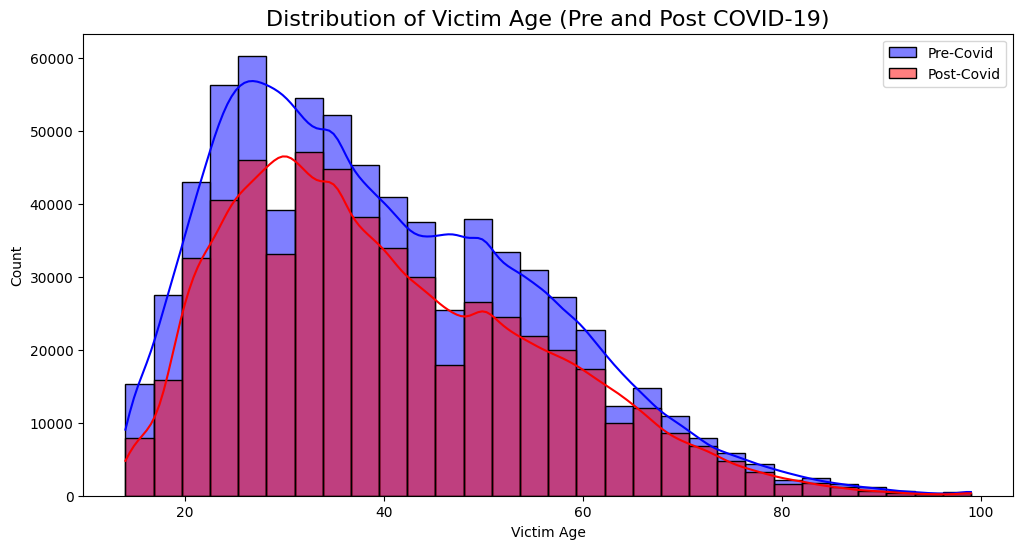

In [84]:
# plot distribution of victim age for pre-covid and post-covid
plt.figure(figsize=(12, 6))
sns.histplot(precovid['Vict Age'], kde=True, color='blue', label='Pre-Covid', bins=30)
sns.histplot(postcovid['Vict Age'], kde=True, color='red', label='Post-Covid', bins=30)
plt.title('Distribution of Victim Age (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.legend()
plt.show()

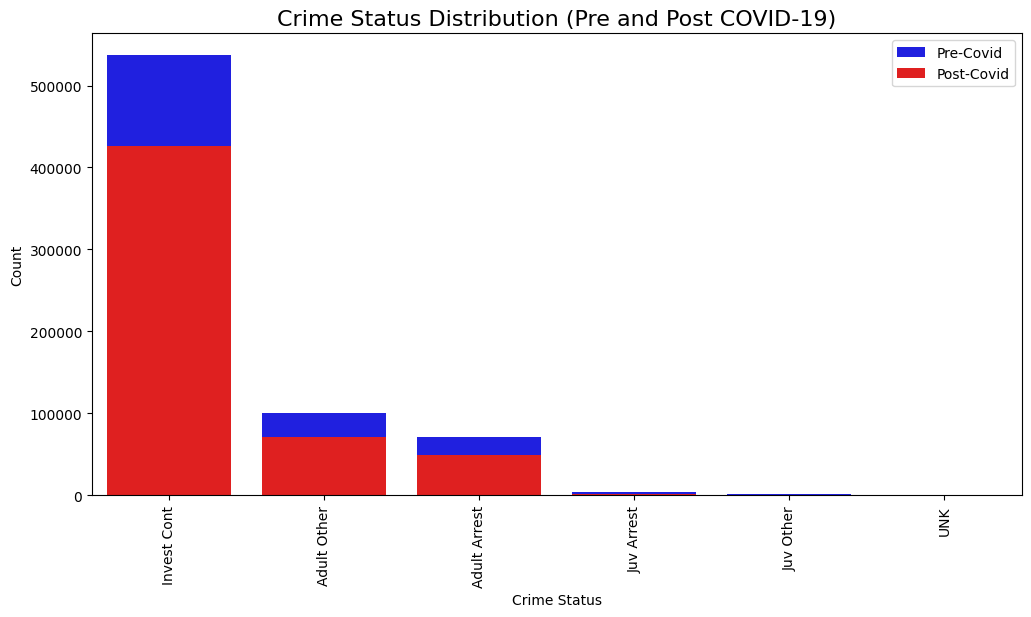

In [85]:
# crime status distribution for pre-covid and post-covid
precovid_status_count = precovid['Status Desc'].value_counts()
postcovid_status_count = postcovid['Status Desc'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=precovid_status_count.index, y=precovid_status_count.values, color='blue', label='Pre-Covid')
sns.barplot(x=postcovid_status_count.index, y=postcovid_status_count.values, color='red', label='Post-Covid')
plt.title('Crime Status Distribution (Pre and Post COVID-19)', fontsize=16)
plt.xlabel('Crime Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

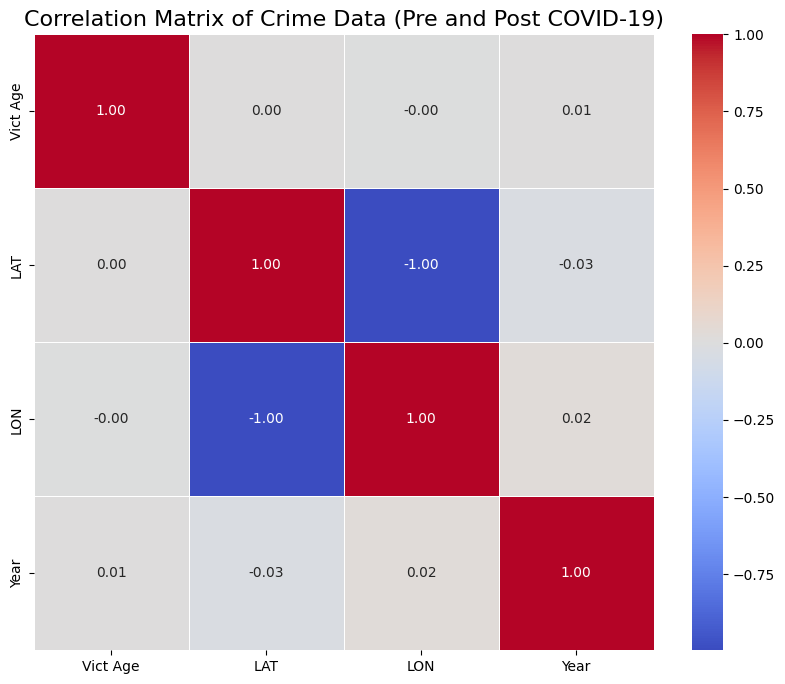

In [86]:
# heatmap of correlation matrix for numerical variables
import warnings
warnings.filterwarnings('ignore')

precovid_numeric = precovid[['Vict Age', 'LAT', 'LON', 'Year']]
postcovid_numeric = postcovid[['Vict Age', 'LAT', 'LON', 'Year']]

combined_data = pd.concat([precovid_numeric, postcovid_numeric])

corr_matrix = combined_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Crime Data (Pre and Post COVID-19)', fontsize=16)
plt.show()

## Multiple Linear Regression

The goal of this section is to use multiple linear regression (OLS) to analyze how socioeconomic factors such as income, population density, and unemployment rate influenced crime rates before and after the COVID-19 pandemic.

We will do the following:

* Quantify the impact of each socioeconomic factor on crime.
* Determine whether crime patterns significantly changed due to the pandemic.
* Identify which factors had the most influence on crime trends over time.

**Cites ChatGPT, HW3 Solutions, Lectures 6-9**

In [122]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import re

### Data Preparation

Before we can run a regression model, we need to make sure our data is structured properly. Right now, we have two separate datasets. One contains crime data from before the COVID-19 pandemic, and the other contains data from after the pandemic. To compare crime trends across both periods, we need to merge them into a single dataset.

In [123]:
# Add a column to show which period each row belongs to
precovid.columns = precovid.columns.str.strip()
postcovid.columns = postcovid.columns.str.strip()

precovid["AREA"] = precovid["AREA"].astype(int)
postcovid["AREA"] = postcovid["AREA"].astype(int)

precovid["Period"] = "Pre-COVID"
postcovid["Period"] = "Post-COVID"

# Merge the datasets into one
combined_periods_df = pd.concat([precovid, postcovid], ignore_index=True)
print(f'New shape of dataframe: {combined_periods_df.shape}')
combined_periods_df.head()

New shape of dataframe: (1264791, 21)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON,Period
0,190514702,2019-08-28,2010-01-01,1200,5,Harbor,524,860,BATTERY WITH SEXUAL CONTACT,1804 0522 0913,...,F,H,402.0,MARKET,AO,Adult Other,600 WILMINGTON BL,33.7749,-118.2764,Pre-COVID
1,191821515,2019-10-07,2010-07-09,1210,18,Southeast,1801,354,THEFT OF IDENTITY,0100 1822,...,F,I,710.0,OTHER PREMISE,IC,Invest Cont,8800 S HOOVER ST,33.9580,-118.2869,Pre-COVID
2,161222122,2016-08-16,2010-01-01,1200,12,77th Street,1249,805,PIMPING,0908 0913,...,F,B,101.0,STREET,IC,Invest Cont,FIGUEROA,33.9781,-118.2827,Pre-COVID
3,160105233,2016-01-16,2010-01-08,900,1,Central,185,310,BURGLARY,0344 1606 1202,...,F,W,120.0,STORAGE SHED,IC,Invest Cont,100 E OLYMPIC BL,34.0405,-118.2567,Pre-COVID
4,160106330,2016-01-29,2010-01-01,700,1,Central,152,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1803 0344,...,F,A,503.0,HOTEL,AA,Adult Arrest,500 S GRAND AV,34.0502,-118.2540,Pre-COVID


With over 1.1 million rows in our original dataset, running an Ordinary Least Squares (OLS) regression would be extremely slow and memory-intensive. To make the analysis more manageable, we downsampled the data to 200,000 rows, taking an even split of 100,000 entries from the Pre-COVID period and the Post-COVID period. This keeps the dataset balanced so that one period doesn’t dominate the analysis while still giving us enough data to detect meaningful trends.

In [124]:
sample_size = 100000 # 100,000 for each period 

precovid_df = combined_periods_df[combined_periods_df["Period"] == "Pre-COVID"]
postcovid_df = combined_periods_df[combined_periods_df["Period"] == "Post-COVID"]

# Randomly sample an equal number of rows from each group
precovid_sample = precovid_df.sample(n=sample_size, random_state=42)
postcovid_sample = postcovid_df.sample(n=sample_size, random_state=42)

combined_periods_df = pd.concat([precovid_sample, postcovid_sample], ignore_index=True)

print(f"Sampled dataset shape: {combined_periods_df.shape}")
print(combined_periods_df["Period"].value_counts())

Sampled dataset shape: (200000, 21)
Period
Pre-COVID     100000
Post-COVID    100000
Name: count, dtype: int64


In addition to reducing the number of rows, we also need to remove columns that do not add predictive value to our model. Some columns contain too many unique values, making them computationally expensive and difficult to interpret, while others are redundant or irrelevant to our analysis. Removing these columns will not only streamline our dataset but also improve the overall efficiency of the regression model. In addition, I will properly group the Crm Cd Desc column to reduce the overall cardinality of the set while making each crime more generalized into distinct groups.

In [125]:
# List of columns to drop
columns_to_drop = (["DR_NO", "Date Rptd", "DATE OCC", "Mocodes", "LAT", "LON", "Rpt Dist No", 
                    "LOCATION", "Status Desc", "TIME OCC", "Premis Desc", "AREA NAME"])

combined_periods_df = combined_periods_df.drop(columns=columns_to_drop)

In [126]:
def classify_crime(crime_desc):
    crime_desc = crime_desc.upper()  
    
    for category, keywords in crime_categories.items():
        if any(re.search(rf"\b{keyword}\b", crime_desc) for keyword in keywords):
            return category  

    return "Miscellaneous Crime"  

crime_categories = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "ROBBERY", "HOMICIDE", "KIDNAPPING", 
        "EXTORTION", "STALKING", "THREATS", "MANSLAUGHTER", "BRANDISH WEAPON"
    ],
    
    "Sexual Crime": [
        "RAPE", "SEXUAL", "INDECENT EXPOSURE", "LEWD", "SODOMY", 
        "ORAL COPULATION", "CHILD PORNOGRAPHY", "SEXUAL PENETRATION"
    ],
    
    "Property Crime": [
        "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING", "LOOTING", 
        "GRAFFITI", "TRESPASSING", "DAMAGE", "BIKE - STOLEN", 
        "THEFT FROM MOTOR VEHICLE", "PURSE SNATCHING", "VEHICLE - STOLEN"
    ],
    
    "Financial/White-Collar Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "IDENTITY THEFT", 
        "BUNCO", "CREDIT CARDS", "DOCUMENT FORGERY", "SCAM"
    ],
    
    "Weapon-Related Crime": [
        "WEAPON", "FIREARM", "GUN", "ILLEGAL POSSESSION", 
        "SHOTS FIRED", "DISCHARGE FIREARM", "REPLICA FIREARMS"
    ],
    
    "Drug & Human Trafficking": [
        "DRUG", "NARCOTICS", "PIMPING", "HUMAN TRAFFICKING"
    ],
    
    "Public Order Crime": [
        "DISORDERLY", "TRESPASSING", "FALSE REPORT", "RESISTING ARREST", 
        "DISTURBING THE PEACE", "PUBLIC INTOXICATION", "CRIMINAL THREATS", 
        "VIOLATION OF RESTRAINING ORDER", "CONTEMPT OF COURT"
    ],
    
    "Miscellaneous Crime": [
        "BOMB SCARE", "ANIMAL CRUELTY", "CONSPIRACY", "EXTORTION", 
        "PROWLER", "PEEPING TOM", "ILLEGAL DUMPING"
    ]
}

baseline_df = combined_periods_df.copy()
baseline_df["Crime Type"] = combined_periods_df["Crm Cd Desc"].apply(classify_crime)
baseline_df = baseline_df.drop(columns=["Crm Cd Desc"])

baseline_df.head()

,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Status,Period,Crime Type
0,15,624,72,F,H,502.0,AA,Pre-COVID,Violent Crime
1,19,761,24,M,H,121.0,AO,Pre-COVID,Violent Crime
2,11,230,37,M,H,406.0,IC,Pre-COVID,Violent Crime
3,17,220,24,F,H,101.0,IC,Pre-COVID,Violent Crime
4,21,624,55,M,O,203.0,JA,Pre-COVID,Violent Crime


Now that the dataset is properly combined, we need to define the response variable for our regression analysis. The response variable represents the outcome we aim to predict or explain based on socioeconomic and categorical covariates. Given our research objective, we must choose a response variable that accurately reflects crime levels across different periods and areas.

This brings us to **total reported crimes per area and period** as the best choice for our analysis. Since we don’t have population data, we can’t calculate crime rates per 1,000 people. Instead, we’ll count the total number of crimes in each police district (AREA) and compare how these numbers changed before and after COVID-19. By using total crime counts, we can measure whether crime increased or decreased after the pandemic while considering socioeconomic factors.

In [127]:
# pull out area by period statistic through groupby computations
crime_counts = baseline_df.groupby(["AREA", "Period"]).size().reset_index(name="Total Crimes")

baseline_df = baseline_df.merge(crime_counts, on=["AREA", "Period"], how="left")
print(baseline_df['Total Crimes'])

0         5085
1         4550
2         4299
3         4012
4         5264
          ... 
199995    5618
199996    4172
199997    5441
199998    4611
199999    6405
Name: Total Crimes, Length: 200000, dtype: int64


### Baseline Model

To analyze how socioeconomic factors influence crime rates, we will fit a basic multiple linear regression model. This model includes all necessary covariates and will serve as the foundation for further analysis until we construct improved models with selected covariates.

In [128]:
baseline_df = baseline_df.rename(columns=lambda x: x.replace(" ", "_"))

dependent_var = "Total_Crimes" 
categorical_vars = ["Period", "Crime Type", "Vict Sex", "Vict Descent", "Status"]

covariates = baseline_df.drop(columns=[dependent_var]).columns
covariates = [f"C({col})" if col in categorical_vars else col for col in covariates]

full_model_formula = f"{dependent_var} ~ " + " + ".join(covariates)
baseline_model = smf.ols(full_model_formula, data=baseline_df).fit()

print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Crimes   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     920.2
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:37:56   Log-Likelihood:            -1.6466e+06
No. Observations:              200000   AIC:                         3.293e+06
Df Residuals:                  199960   BIC:                         3.294e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### Interpreting the Baseline Model Output

The baseline regression model gives initial insights into how different factors influence total crime counts. The R-squared value (0.152) suggests the model explains about 15.2% of the variation in total crimes, which is reasonable given the complexity of crime trends.

* Key Predictors: Location (AREA) strongly impacts total crime counts, confirming crime varies geographically. Crime type categories (e.g., property crime, violent crime, white-collar crime) also show significant effects. Victim demographics have mixed significance, with age and some sex categories influencing crime counts.

* COVID-19 Period Effect: The Pre-COVID coefficient (8.1652, p = 0.333) is not statistically significant, suggesting no strong evidence that overall crime levels shifted due to the pandemic.

* Next Steps: We will test OLS assumptions to validate the model and conduct VIF analysis to check for multicollinearity, ensuring our conclusions about crime trends and COVID-19’s impact are reliable.

### Checking OLS Assumptions

Before drawing conclusions from our regression model, we need to verify whether the fundamental assumptions of Ordinary Least Squares (OLS) regression are met. These assumptions ensure that our model produces unbiased, consistent, and efficient estimates.

We will test the following assumptions:

1. **Independence** – The residuals should not be correlated with each other.
2. **Homoscedasticity** – The variance of the residuals should remain constant across all fitted values.
3. **Normality of Residuals** – The residuals should follow a normal distribution.
4. **Linearity** – The relationship between the covariates and the response variable should be linear.
5. **Completeness** – All relevant covariates should be included to avoid omitted variable bias.

If any assumption is violated, it may affect the validity of our model’s inferences. We will now systematically check each assumption and determine whether any corrective actions are necessary.

### I. Independence

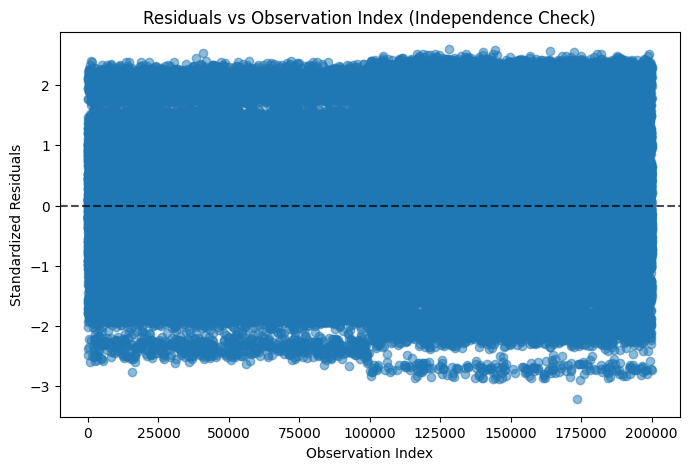

In [129]:
import matplotlib.pyplot as plt

# Standardize residuals
standardized_residuals = (baseline_model.resid - baseline_model.resid.mean()) / baseline_model.resid.std()

# Scatter plot of residuals against observation index
plt.figure(figsize=(8, 5))
plt.scatter(range(len(standardized_residuals)), standardized_residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.xlabel("Observation Index")
plt.ylabel("Standardized Residuals")
plt.title("Residuals vs Observation Index (Independence Check)")
plt.show()

The scatterplot of standardized residuals against the observation index shows a random distribution with no clear patterns or trends. This suggests that the residuals are independent, meaning there is no noticeable correlation between error terms. Based on this, the assumption of independence appears to be satisfied.

### II. Heteroscedasticity

In [130]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test for heteroscedasticity
p_value = het_breuschpagan(baseline_model.resid, baseline_model.model.exog)[3]

# Print the p-value
print(f'Breusch-Pagan Test p-value: {p_value}')

Breusch-Pagan Test p-value: 0.0


This test evaluates whether the variance of residuals remains constant across different levels of the independent variables. A low p-value suggests that heteroscedasticity is present, meaning the model’s residuals do not have constant variance. The test returned a p-value of 0.0, which strongly indicates a violation of the homoscedasticity assumption. This suggests that the error variance is not constant, which may lead to inefficient coefficient estimates and biased standard errors.

III. Normality of Residuals

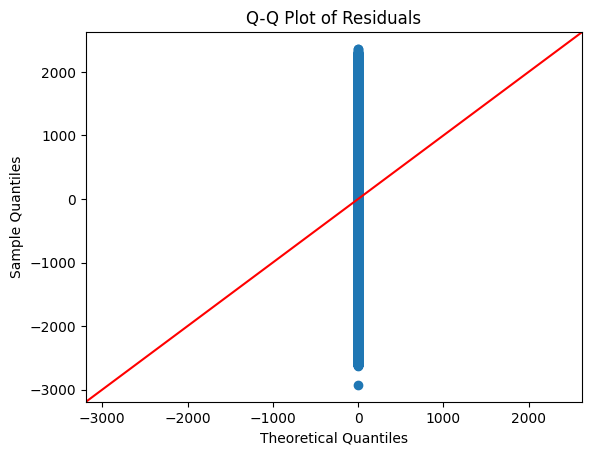

In [131]:
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(baseline_model.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

The Q-Q plot indicates a severe deviation from normality, as the residuals do not follow the expected diagonal line. This suggests potential skewness or heavy tails in the distribution. As a result, there is a violation of the normality of the residuals.

### IV. Linearity

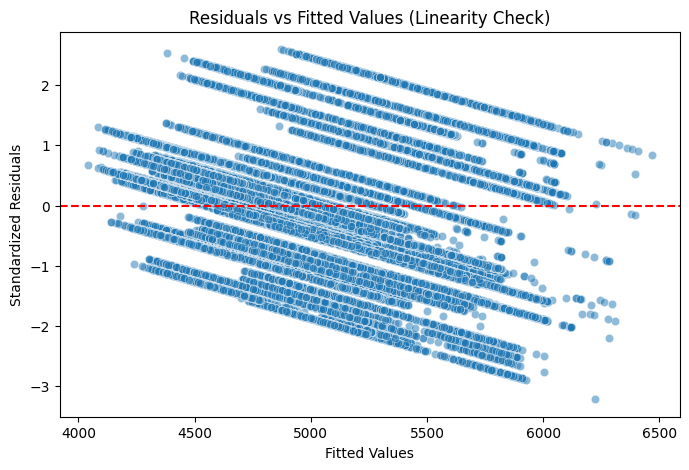

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing residuals
standardized_residuals = (baseline_model.resid - baseline_model.resid.mean()) / baseline_model.resid.std()

# Scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=baseline_model.fittedvalues, y=standardized_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.title("Residuals vs Fitted Values (Linearity Check)")
plt.show()

Based on the residuals vs. fitted values plot, there appears to be a clear pattern in the residuals, suggesting a violation of the linearity assumption. Instead of being randomly scattered around zero, the residuals show a structured, non-random pattern, indicating that the relationship between the predictors and the response variable may not be purely linear.

### V. Completeness

The completeness assumption requires that all relevant variables influencing crime trends are included in the model. In our preprocessing step, we proactively removed columns with excessive unique values, redundancy, or lack of predictive power. However, to further verify completeness, we will conduct Variance Inflation Factor (VIF) analysis to identify collinear variables. If necessary, we will refine our model by removing redundant covariates to improve interpretability and predictive performance.

## IVF Analysis

Before improving our model, we need to check for multicollinearity, which happens when some predictor variables are too closely related to each other. This can make it hard to figure out how much each variable actually contributes to explaining the response variable. To test for this, we calculate the Variance Inflation Factor (VIF) for each covariate. If a variable has a VIF greater than 5, it means it's strongly correlated with other predictors, which can distort our results. If we find multicollinearity, we may need to drop or adjust certain variables to make the model more reliable and easier to interpret.

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

exog = baseline_model.model.exog
names = baseline_model.params.index

# Compute and print VIF for each covariate
vif_results = []
for i in range(1, exog.shape[1]):  
    vif_results.append((names[i], variance_inflation_factor(exog, i)))

vif_df = pd.DataFrame(vif_results, columns=["Feature", "VIF"])
vif_df

,Feature,VIF
0,Vict_Sex[T.H],1.009024
1,Vict_Sex[T.M],1.066132
2,Vict_Sex[T.N],1.000072
3,Vict_Sex[T.X],1.968583
4,Vict_Descent[T.A],inf
5,Vict_Descent[T.B],inf
6,Vict_Descent[T.C],inf
7,Vict_Descent[T.D],inf
8,Vict_Descent[T.F],inf
9,Vict_Descent[T.G],inf


The VIF results reveal severe multicollinearity issues in the dataset. The Vict_Descent categories have infinite VIF values, indicating perfect correlation, likely due to redundancy in encoding. Additionally, the Crime_Type variables show extremely high VIF values (above 200 for some categories), suggesting that certain crime classifications overlap significantly. Other covariates, such as Period (4.29) and Year (4.31), are approaching the threshold of concern but are not immediate issues.

To resolve these problems, we need to drop redundant categories, merge overlapping classifications, and re-run the VIF analysis to ensure all remaining covariates fall below the acceptable threshold. Addressing these multicollinearity concerns will improve model stability and ensure more reliable coefficient interpretations in the improved model.

## Improved Model

After conducting the VIF analysis, we identified several covariates exhibiting high multicollinearity, particularly the Vict_Descent variable, which had infinite VIF values. Additionally, the Crime_Type variable showed significant collinearity, indicating that its current categorization might be too detailed for effective modeling. To improve our regression model, we will take the following steps:

* Remove Vict_Descent since its multicollinearity makes it unreliable for interpretation.
* Reclassify Crime_Type into broader, more general categories to reduce redundancy.
* Refit the OLS model using the adjusted set of covariates.

By making these refinements, our goal is to produce a more stable and interpretable model that better identifies the key factors influencing crime patterns before and after COVID-19.

In [134]:
improved_df = combined_periods_df.drop(columns=["Vict Descent"])

# broader crime categories
crime_type_mapping = {
    "Violent Crime": ["ASSAULT", "BATTERY", "ROBBERY", "HOMICIDE", "RAPE", "KIDNAPPING", "EXTORTION", "STALKING"],
    "Property Crime": ["BURGLARY", "THEFT", "VANDALISM", "SHOPLIFTING", "LOOTING"],
    "White-Collar Crime": ["FRAUD", "FORGERY", "EMBEZZLEMENT", "IDENTITY THEFT"],
    "Public Order Crime": ["TRESPASSING", "RESISTING ARREST", "DISORDERLY CONDUCT", "DISTURBING THE PEACE"],
    "Weapon-Related Crime": ["FIREARM", "WEAPON"],
    "Sexual Crime": ["SEXUAL", "LEWD", "INDECENT EXPOSURE", "CHILD ABUSE", "PORNOGRAPHY"],
    "Miscellaneous Crime": ["OTHER", "PROWLER", "UNAUTHORIZED COMPUTER ACCESS", "FALSE REPORT", "ILLEGAL"]
}

def reclassify_crime(crime_desc):
    crime_desc = crime_desc.upper()
    for category, keywords in crime_type_mapping.items():
        if any(keyword in crime_desc for keyword in keywords):
            return category
    return "Miscellaneous Crime"  

improved_df["Crime_Type"] = improved_df["Crm Cd Desc"].apply(reclassify_crime)

In [135]:
# pull out area by period statistic through groupby computations
crime_counts = improved_df.groupby(["AREA", "Period"]).size().reset_index(name="Total Crimes")

improved_df = improved_df.merge(crime_counts, on=["AREA", "Period"], how="left")
improved_df = improved_df.drop(columns=["Crm Cd Desc"])

# new df with adjusted covariates
improved_df.head()

,AREA,Crm Cd,Vict Age,Vict Sex,Premis Cd,Status,Period,Crime_Type,Total Crimes
0,15,624,72,F,502.0,AA,Pre-COVID,Violent Crime,5085
1,19,761,24,M,121.0,AO,Pre-COVID,Weapon-Related Crime,4550
2,11,230,37,M,406.0,IC,Pre-COVID,Violent Crime,4299
3,17,220,24,F,101.0,IC,Pre-COVID,Violent Crime,4012
4,21,624,55,M,203.0,JA,Pre-COVID,Violent Crime,5264


In [136]:
improved_df = improved_df.rename(columns=lambda x: x.replace(" ", "_"))

dependent_var = "Total_Crimes" 
categorical_vars = ["Period", "Crime Type", "Vict Sex", "Status"]

covariates = improved_df.drop(columns=[dependent_var]).columns
covariates = [f"C({col})" if col in categorical_vars else col for col in covariates]

full_model_formula = f"{dependent_var} ~ " + " + ".join(covariates)
improved_model = smf.ols(full_model_formula, data=improved_df).fit()

print(improved_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Crimes   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     904.0
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:40:04   Log-Likelihood:            -1.6544e+06
No. Observations:              200000   AIC:                         3.309e+06
Df Residuals:                  199979   BIC:                         3.309e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Interpreting the Improved Model Output

The improved model refines our analysis of crime trends pre- and post-COVID by reducing multicollinearity and restructuring crime categories. The R-squared value dropped to 0.083, meaning it explains 8.3% of the variation in total crimes, which is expected after removing highly correlated variables.

Key takeaways:

* Crime Type Matters: Property, public order, and white-collar crimes are linked to lower crime totals, while violent and weapon-related crimes show higher totals.
* Case Status Impact: Certain case statuses (IC, JA, AO) significantly influence crime totals, possibly reflecting reporting trends.
* Geographic Variation: The AREA variable remains a strong predictor, indicating location-based crime differences.
* Demographic Influence: Victim age and sex categories show some statistical significance, hinting at crime reporting or victimization trends.

## Significant Findings and Answering the Overarching Question

This analysis aimed to examine how socio-economic factors such as victim demographics, crime type, and area-specific influences contributed to crime rates, and to assess whether crime patterns evolved due to the COVID-19 pandemic. We employed two multiple linear regression models: the baseline model with all covariates and the improved model, which adjusted for multicollinearity by reclassifying crime categories and removing variables with high correlations.

### Key Findings:

* **Impact of COVID-19 on Crime Patterns**: Despite hypothesizing potential changes in crime levels due to the pandemic, the Period variable (representing Pre-COVID vs. Post-COVID) was not statistically significant in either model. This suggests that **COVID-19 did not have a substantial, direct impact** on overall crime rates in the locations studied. It’s possible that other socio-economic factors, rather than the pandemic itself, may have had a more influential role in shaping crime patterns during this period.

* **Socio-Economic Factors Influencing Crime Rates**:
    * **Crime Type**: Various crime categories showed significant associations with total crime levels. Notably, violent crimes and weapon-related crimes were positively correlated with crime rates, whereas property crimes and white-collar crimes showed a significant decrease, likely reflecting societal changes brought on by the pandemic.
    * **Victim Demographics**: The analysis of victim sex revealed that certain victim categories were significant, pointing to demographic factors that might influence crime rates and trends.
    * **Geographical Location (AREA)**: The location of the crime was the most significant predictor of crime levels. Crime rates varied widely by area, indicating that geographical and socio-economic conditions specific to certain regions played a critical role in shaping crime patterns.

### Model Performance & Assumption Violations:

* **Comparison of Models**: The **baseline model** (R² = 0.152) explained more of the variance in crime rates than the **improved model** (R² = 0.083). However, both models exhibited key violations of OLS assumptions, which could undermine the validity of the regression results:
    * **Homoscedasticity Violation**: The variance of residuals was not constant across the model, which could lead to inefficient estimates and biased standard errors.
    * **Normality Violation**: The residuals deviated significantly from normality, which affects the accuracy of hypothesis tests and p-values.
    * **Linearity Violation**: The residual plot suggested that some relationships between the predictors and crime levels may be nonlinear, indicating that a linear model may not fully capture the complexity of the relationships.

### Final Interpretation:

Although key socio-economic factors such as **crime type, location**, and **victim demographics** significantly influenced crime levels, the violations of OLS assumptions suggest that the linear regression model may not fully capture the complexity of these relationships. COVID-19, contrary to initial expectations, did not appear to directly affect crime levels in this dataset, although changes in other socio-economic variables may have been influential. These findings suggest that future work should explore nonlinear models, robust regression techniques, or additional socio-economic data to improve our understanding of how crime patterns evolve, especially in light of large-scale socio-economic disruptions like the COVID-19 pandemic.

In [149]:
import numpy as np
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Multinomial Logistic Regression

In [150]:
precovid_mlr = precovid.sample(n=1000, random_state=42)

In [ ]:
precovid_mlr['TIME_OCC_DAY_OR_NIGHT'] = precovid_mlr['TIME OCC'].apply(
    lambda x: 1 if 600 <= x < 1800 else 0
)
precovid_mlr['DATE_OCC_DAY'] = precovid_mlr['DATE OCC'].dt.weekday + 1

In [152]:
precovid_mlr.columns = [col.replace(' ', '_') for col in precovid_mlr.columns]

In [153]:
precovid_mlr.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Mocodes,...,Status,Status_Desc,LOCATION,LAT,LON,Period,day,Age_Bin,TIME_OCC_DAY_OR_NIGHT,DATE_OCC_DAY
2103827,191510441,2019-05-05,2019-05-03,1630,15,N Hollywood,1514,624,BATTERY - SIMPLE ASSAULT,0400 0444 0360,...,AA,Adult Arrest,6900 AGNES AV,34.1959,-118.3954,Pre-COVID,2019-05-05,60+,1,5
1956663,191901213,2019-11-10,2019-11-10,1930,19,Mission,1913,761,BRANDISH WEAPON,0421 0416 0522 1402,...,AO,Adult Other,15000 LA VALLE ST,34.3089,-118.4596,Pre-COVID,2019-11-10,14-24,0,7
1342081,161100804,2016-07-03,2016-07-02,1650,11,Northeast,1124,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1402 0447,...,IC,Invest Cont,3100 N SAN FERNANDO RD,34.1149,-118.2458,Pre-COVID,2016-07-03,25-39,1,6
1699031,181704847,2018-01-18,2018-01-18,1930,17,Devonshire,1794,220,ATTEMPTED ROBBERY,0906 0417 0448 0429,...,IC,Invest Cont,NAPA,34.2251,-118.5372,Pre-COVID,2018-01-18,14-24,0,4
1457890,172100533,2017-01-19,2017-01-13,1500,21,Topanga,2145,624,BATTERY - SIMPLE ASSAULT,0416,...,JA,Juv Arrest,6900 TOPANGA CANYON BL,34.1923,-118.6104,Pre-COVID,2017-01-19,40-59,1,5


In [155]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')

precovid_mlr_new = precovid_mlr.sample(n=1000)

# Extract year from DATE_OCC and add it as a new column
precovid_mlr_new['Year'] = precovid_mlr_new['DATE_OCC'].dt.year

# Convert target to numeric codes explicitly: inspired by chatgpt
precovid_mlr_new['y'] = precovid_mlr_new['Crm_Cd'].astype('category').cat.codes

# Define formula: refer to the lecture note of class 8
formula = 'y ~ Vict_Age + LAT + LON + Year'

# Fit model with regularization
# inspired by chatgpt to add regularization to it
mnlogit_model = sm.MNLogit.from_formula(formula, data=precovid_mlr_new).fit_regularized(alpha=0.1)

print(mnlogit_model.summary())

Iteration limit reached    (Exit mode 9)
            Current function value: 3.128621785589412
            Iterations: 1000
            Function evaluations: 1284
            Gradient evaluations: 1000
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      710
Method:                           MLE   Df Model:                          232
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                 0.04347
Time:                        22:59:07   Log-Likelihood:                -3107.4
converged:                      False   LL-Null:                       -3248.7
Covariance Type:            nonrobust   LLR p-value:                   0.01315
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

## Hypothesis Testing

In [141]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
import warnings

In [142]:
# 1) Two-Sample t-Test on Daily Crime Counts

precovid['day'] = precovid['Date Rptd'].dt.date
postcovid['day'] = postcovid['Date Rptd'].dt.date
precovid_daily_counts = precovid.groupby('day').size()
postcovid_daily_counts = postcovid.groupby('day').size()
t_stat, p_value = ttest_ind(precovid_daily_counts, postcovid_daily_counts, equal_var=False)  

print("=== Two-Sample t-Test on Daily Crime Counts (Pre vs. Post) ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value     : {p_value:.6f}")

if p_value < 0.05:
    print("=> Reject H0 at the 5% significance level. There is a significant difference in daily crime counts.")
else:
    print("=> Fail to reject H0. No statistically significant difference in daily crime counts.")

=== Two-Sample t-Test on Daily Crime Counts (Pre vs. Post) ===
T-statistic: 24.0641
P-value     : 0.000000
=> Reject H0 at the 5% significance level. There is a significant difference in daily crime counts.


In [143]:
# 2) Chi-Square Test for Distribution of Crime Types
warnings.filterwarnings('ignore')

top_n = 10
top_precovid_categories = precovid['Crm Cd Desc'].value_counts().index[:top_n]
top_postcovid_categories = postcovid['Crm Cd Desc'].value_counts().index[:top_n]

top_categories = set(top_precovid_categories).union(set(top_postcovid_categories))

def categorize(crime_desc, top_set):
    if crime_desc in top_set:
        return crime_desc
    else:
        return "Other"

precovid_cats = precovid['Crm Cd Desc'].apply(lambda x: categorize(x, top_categories))
postcovid_cats = postcovid['Crm Cd Desc'].apply(lambda x: categorize(x, top_categories))

pre_counts = precovid_cats.value_counts()
post_counts = postcovid_cats.value_counts()

all_labels = sorted(set(pre_counts.index).union(set(post_counts.index)))

contingency = pd.DataFrame(index=['PreCOVID','PostCOVID'], columns=all_labels).fillna(0)

for label in all_labels:
    contingency.loc['PreCOVID', label] = pre_counts.get(label, 0)
    contingency.loc['PostCOVID', label] = post_counts.get(label, 0)

chi2, p, dof, expected = chi2_contingency(contingency)

print("\n=== Chi-Square Test for Distribution of Crime Categories (Pre vs. Post) ===")
print("Chi-Square Statistic: ", chi2)
print("p-value            : ", p)
print("Degrees of Freedom : ", dof)

if p < 0.05:
    print("=> Reject H0. The distribution of crime categories changed significantly.")
else:
    print("=> Fail to reject H0. No significant change in the distribution of crime categories.")

print("\nContingency Table:")
print(contingency)


=== Chi-Square Test for Distribution of Crime Categories (Pre vs. Post) ===
Chi-Square Statistic:  40407.923325950804
p-value            :  0.0
Degrees of Freedom :  11
=> Reject H0. The distribution of crime categories changed significantly.

Contingency Table:
           ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
PreCOVID                                            41215   
PostCOVID                                           40392   

           BATTERY - SIMPLE ASSAULT  BURGLARY  BURGLARY FROM VEHICLE  \
PreCOVID                      72434     46484                  68095   
PostCOVID                     57046     30829                  44573   

           INTIMATE PARTNER - SIMPLE ASSAULT   Other  ROBBERY  \
PreCOVID                               49210  236093    30343   
PostCOVID                              37086  164759    20352   

           THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)  \
PreCOVID                                                   0     
PostCOV

In [144]:
# 3) Two-Sample Proportion Tests for several crime categories

categories_to_test = [
    "BURGLARY",
    "BATTERY - SIMPLE ASSAULT",
    "ROBBERY",
    "THEFT OF IDENTITY",
    "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"
]

def category_match(desc, cat):
    return cat.upper() in desc.upper()

for cat in categories_to_test:
    pre_total = precovid.shape[0]
    post_total = postcovid.shape[0]
    pre_count = precovid['Crm Cd Desc'].apply(lambda x: category_match(x, cat)).sum()
    post_count = postcovid['Crm Cd Desc'].apply(lambda x: category_match(x, cat)).sum()
    
    counts = np.array([pre_count, post_count])
    nobs = np.array([pre_total, post_total])
    z_stat, p_val = proportions_ztest(counts, nobs)
    
    print(f"\n=== Two-Sample Proportion Test for '{cat}' ===")
    print(f"  Pre-COVID count = {pre_count} of {pre_total}")
    print(f"  Post-COVID count = {post_count} of {post_total}")
    print(f"  Z-statistic = {z_stat:.4f}, p-value = {p_val:.6f}")
    
    if p_val < 0.05:
        print(f"  => Reject H0. The proportion of {cat} changed significantly post-COVID.")
    else:
        print(f"  => Fail to reject H0. No significant change in the proportion of {cat}.")


=== Two-Sample Proportion Test for 'BURGLARY' ===
  Pre-COVID count = 119321 of 714992
  Post-COVID count = 78020 of 549799
  Z-statistic = 38.3740, p-value = 0.000000
  => Reject H0. The proportion of BURGLARY changed significantly post-COVID.

=== Two-Sample Proportion Test for 'BATTERY - SIMPLE ASSAULT' ===
  Pre-COVID count = 72434 of 714992
  Post-COVID count = 57046 of 549799
  Z-statistic = -4.5067, p-value = 0.000007
  => Reject H0. The proportion of BATTERY - SIMPLE ASSAULT changed significantly post-COVID.

=== Two-Sample Proportion Test for 'ROBBERY' ===
  Pre-COVID count = 34829 of 714992
  Post-COVID count = 23732 of 549799
  Z-statistic = 14.7179, p-value = 0.000000
  => Reject H0. The proportion of ROBBERY changed significantly post-COVID.

=== Two-Sample Proportion Test for 'THEFT OF IDENTITY' ===
  Pre-COVID count = 46829 of 714992
  Post-COVID count = 45508 of 549799
  Z-statistic = -37.0233, p-value = 0.000000
  => Reject H0. The proportion of THEFT OF IDENTITY chan

In [146]:
# 4) Chi-Square Test for Distribution of Crime across Areas
warnings.filterwarnings('ignore')

N = 10
top_areas_pre = precovid['AREA NAME'].value_counts().index[:N]
top_areas_post = postcovid['AREA NAME'].value_counts().index[:N]
all_top_areas = set(top_areas_pre).union(set(top_areas_post))

def area_or_other(area_name, top_list):
    return area_name if area_name in top_list else "Other"

pre_areas = precovid['AREA NAME'].apply(lambda x: area_or_other(x, all_top_areas))
post_areas = postcovid['AREA NAME'].apply(lambda x: area_or_other(x, all_top_areas))
pre_counts = pre_areas.value_counts()
post_counts = post_areas.value_counts()
all_labels = sorted(set(pre_counts.index).union(set(post_counts.index)))
contingency = pd.DataFrame(index=['PreCOVID','PostCOVID'], columns=all_labels).fillna(0)

for label in all_labels:
    contingency.loc['PreCOVID', label] = pre_counts.get(label, 0)
    contingency.loc['PostCOVID', label] = post_counts.get(label, 0)

chi2_loc, p_loc, dof_loc, exp_loc = chi2_contingency(contingency)

print("\n=== Chi-Square Test for Distribution of Crimes Across Areas (Pre vs. Post) ===")
print("Chi-square statistic: ", chi2_loc)
print("p-value            : ", p_loc)
print("Degrees of freedom : ", dof_loc)
if p_loc < 0.05:
    print("=> Reject H0. The geographic distribution of crimes changed significantly.")
else:
    print("=> Fail to reject H0. No significant change in geographic distribution.")
    
print("\nContingency Table (rows=Pre/Post, cols=Top Areas + Other):")
print(contingency)


=== Chi-Square Test for Distribution of Crimes Across Areas (Pre vs. Post) ===
Chi-square statistic:  1858.106036934496
p-value            :  0.0
Degrees of freedom :  12
=> Reject H0. The geographic distribution of crimes changed significantly.

Contingency Table (rows=Pre/Post, cols=Top Areas + Other):
           77th Street  Central  Hollywood  N Hollywood  Olympic   Other  \
PreCOVID         48023    42939      34791        36399    33273  261682   
PostCOVID        34729    39310      29959        26409    27246  195812   

           Pacific  Southeast  Southwest  Topanga  Van Nuys  West LA  Wilshire  
PreCOVID     36408      37206      48752    37911     33672    30892     33044  
PostCOVID    30974      28087      34565    25284     25063    25741     26620  


In [147]:
# 5) Two-Sample Proportion Test for proportion of female victims

pre_total = precovid.shape[0]
post_total = postcovid.shape[0]

pre_f_count = (precovid['Vict Sex'] == 'F').sum()
post_f_count = (postcovid['Vict Sex'] == 'F').sum()

from statsmodels.stats.proportion import proportions_ztest

counts = np.array([pre_f_count, post_f_count])
nobs = np.array([pre_total, post_total])
z_sex, p_sex = proportions_ztest(counts, nobs)

pre_prop_f = pre_f_count / pre_total
post_prop_f = post_f_count / post_total
diff_f = post_prop_f - pre_prop_f

print("\n=== Two-Sample Proportion Test for Female Victims (Pre vs. Post) ===")
print(f"Pre-COVID proportion female: {pre_prop_f:.5f}  (count={pre_f_count})")
print(f"Post-COVID proportion female: {post_prop_f:.5f} (count={post_f_count})")
print(f"Difference (Post - Pre) = {diff_f:.5f}")
print(f"Z-statistic = {z_sex:.4f}, p-value = {p_sex:.6f}")

if p_sex < 0.05:
    print("=> Reject H0. The proportion of female victims changed significantly post-COVID.")
else:
    print("=> Fail to reject H0. No significant change in proportion of female victims.")


=== Two-Sample Proportion Test for Female Victims (Pre vs. Post) ===
Pre-COVID proportion female: 0.49044  (count=350660)
Post-COVID proportion female: 0.48166 (count=264814)
Difference (Post - Pre) = -0.00878
Z-statistic = 9.7965, p-value = 0.000000
=> Reject H0. The proportion of female victims changed significantly post-COVID.


In [148]:
# 6) Chi-Square Test for Distribution of Victim Age

age_bins = [14, 25, 40, 60, 120]
age_labels = ["14-24", "25-39", "40-59", "60+"]
precovid['Age Bin'] = pd.cut(precovid['Vict Age'], bins=age_bins, labels=age_labels, right=False)
postcovid['Age Bin'] = pd.cut(postcovid['Vict Age'], bins=age_bins, labels=age_labels, right=False)
pre_counts = precovid['Age Bin'].value_counts().sort_index()
post_counts = postcovid['Age Bin'].value_counts().sort_index()
contingency_age = pd.DataFrame([pre_counts, post_counts], 
                               index=['PreCOVID','PostCOVID'])

chi2_age, p_age, dof_age, expected_age = chi2_contingency(contingency_age)

print("\n=== Chi-Square Test for Distribution of Victim Age Bins (Pre vs. Post) ===")
print("Chi-square statistic:", chi2_age)
print("p-value            :", p_age)
print("Degrees of freedom :", dof_age)

if p_age < 0.05:
    print("=> Reject H0. The distribution of victim ages across these bins changed significantly.")
else:
    print("=> Fail to reject H0. No significant change in victim age distribution bins.")

print("\nContingency table (rows=Pre/Post, columns=Age Bins):")
print(contingency_age)


=== Chi-Square Test for Distribution of Victim Age Bins (Pre vs. Post) ===
Chi-square statistic: 1594.6559956304054
p-value            : 0.0
Degrees of freedom : 3
=> Reject H0. The distribution of victim ages across these bins changed significantly.

Contingency table (rows=Pre/Post, columns=Age Bins):
Age Bin     14-24   25-39   40-59    60+
PreCOVID   122256  271306  233465  87965
PostCOVID   82183  223946  174708  68962
